DATA PREPARATION

In [1]:

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [2]:


# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# If the dataset is too wide, wrap text instead of cutting off
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'left')

df = pd.read_csv("./spotify_songs.csv")





In [3]:
df.head()

track_id                track_name                                         track_artist       track_popularity track_album_id          track_album_name                                   track_album_release_date playlist_name playlist_id             playlist_genre playlist_subgenre  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo    duration_ms
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran  66                2oCs0DGTsRO98Gh5ZSl2Cx  I Don't Care (with Justin Bieber) [Loud Luxury...  2019-06-14               Pop Remix     37i9dQZF1DXcZDD7cfEKhW  pop            dance pop         0.748         0.916    6  -2.634     1     0.0583       0.1020        0.000000          0.0653    0.518    122.036  194754     
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix          Maroon 5  67                63rPSO264uRjW1X5E6cWv6                    Memories (Dillon Francis Remix)  2019-12-13               Pop Remix     37i9dQZF1DXcZDD7cfEKhW  pop            dance pop         0.726         0.815   11  -4.969     1     0.0373       0.0724        0.004210          0.3570    0.693     99.972  162600     
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix      Zara Larsson  70                1HoSmj2eLcsrR0vE9gThr4                    All the Time (Don Diablo Remix)  2019-07-05               Pop Remix     37i9dQZF1DXcZDD7cfEKhW  pop            dance pop         0.675         0.931    1  -3.432     0     0.0742       0.0794        0.000023          0.1100    0.613    124.008  176616     
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix  The Chainsmokers  60                1nqYsOef1yKKuGOVchbsk6                        Call You Mine - The Remixes  2019-07-19               Pop Remix     37i9dQZF1DXcZDD7cfEKhW  pop            dance pop         0.718         0.930    7  -3.778     1     0.1020       0.0287        0.000009          0.2040    0.277    121.956  169093     
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix     Lewis Capaldi  69                7m7vv9wlQ4i0LFuJiE2zsQ            Someone You Loved (Future Humans Remix)  2019-03-05               Pop Remix     37i9dQZF1DXcZDD7cfEKhW  pop            dance pop         0.650         0.833    1  -4.672     1     0.0359       0.0803        0.000000          0.0833    0.725    123.976  189052

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

Based on the info provided there are 23 features, 11 are Categorical and 12 are numerical data. The dataset has no null values


In [5]:
df.describe()

track_popularity  danceability  energy        key           loudness      mode          speechiness   acousticness  instrumentalness  liveness      valence       tempo         duration_ms  
count  32833.000000      32833.000000  32833.000000  32833.000000  32833.000000  32833.000000  32833.000000  32833.000000  32833.000000      32833.000000  32833.000000  32833.000000   32833.000000
mean      42.477081          0.654850      0.698619      5.374471     -6.719499      0.565711      0.107068      0.175334      0.084747          0.190176      0.510561    120.881132  225799.811622
std       24.984074          0.145085      0.180910      3.611657      2.988436      0.495671      0.101314      0.219633      0.224230          0.154317      0.233146     26.903624   59834.006182
min        0.000000          0.000000      0.000175      0.000000    -46.448000      0.000000      0.000000      0.000000      0.000000          0.000000      0.000000      0.000000    4000.000000
25%       24.000000          0.563000      0.581000      2.000000     -8.171000      0.000000      0.041000      0.015100      0.000000          0.092700      0.331000     99.960000  187819.000000
50%       45.000000          0.672000      0.721000      6.000000     -6.166000      1.000000      0.062500      0.080400      0.000016          0.127000      0.512000    121.984000  216000.000000
75%       62.000000          0.761000      0.840000      9.000000     -4.645000      1.000000      0.132000      0.255000      0.004830          0.248000      0.693000    133.918000  253585.000000
max      100.000000          0.983000      1.000000     11.000000      1.275000      1.000000      0.918000      0.994000      0.994000          0.996000      0.991000    239.440000  517810.000000

In [6]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

In [9]:
df['playlist_subgenre'].unique()

array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism',
       'hip hop', 'southern hip hop', 'gangster rap', 'trap',
       'album rock', 'classic rock', 'permanent wave', 'hard rock',
       'tropical', 'latin pop', 'reggaeton', 'latin hip hop',
       'urban contemporary', 'hip pop', 'new jack swing', 'neo soul',
       'electro house', 'big room', 'pop edm',
       'progressive electro house'], dtype=object)

In [10]:

new_df = df.drop(['track_id', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id'], axis=1)

In [11]:

new_df = new_df.dropna()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         32828 non-null  object 
 1   track_artist       32828 non-null  object 
 2   track_popularity   32828 non-null  int64  
 3   playlist_genre     32828 non-null  object 
 4   playlist_subgenre  32828 non-null  object 
 5   danceability       32828 non-null  float64
 6   energy             32828 non-null  float64
 7   key                32828 non-null  int64  
 8   loudness           32828 non-null  float64
 9   mode               32828 non-null  int64  
 10  speechiness        32828 non-null  float64
 11  acousticness       32828 non-null  float64
 12  instrumentalness   32828 non-null  float64
 13  liveness           32828 non-null  float64
 14  valence            32828 non-null  float64
 15  tempo              32828 non-null  float64
 16  duration_ms        32828 no

In [12]:
new_df = new_df.drop_duplicates()

# EXPLANATORY DATA ANALYSIS


<ipython-input-13-5d2ed5d3d5d8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=playlist_subgenre_popularity.values, y=playlist_subgenre_popularity.index, palette="viridis")


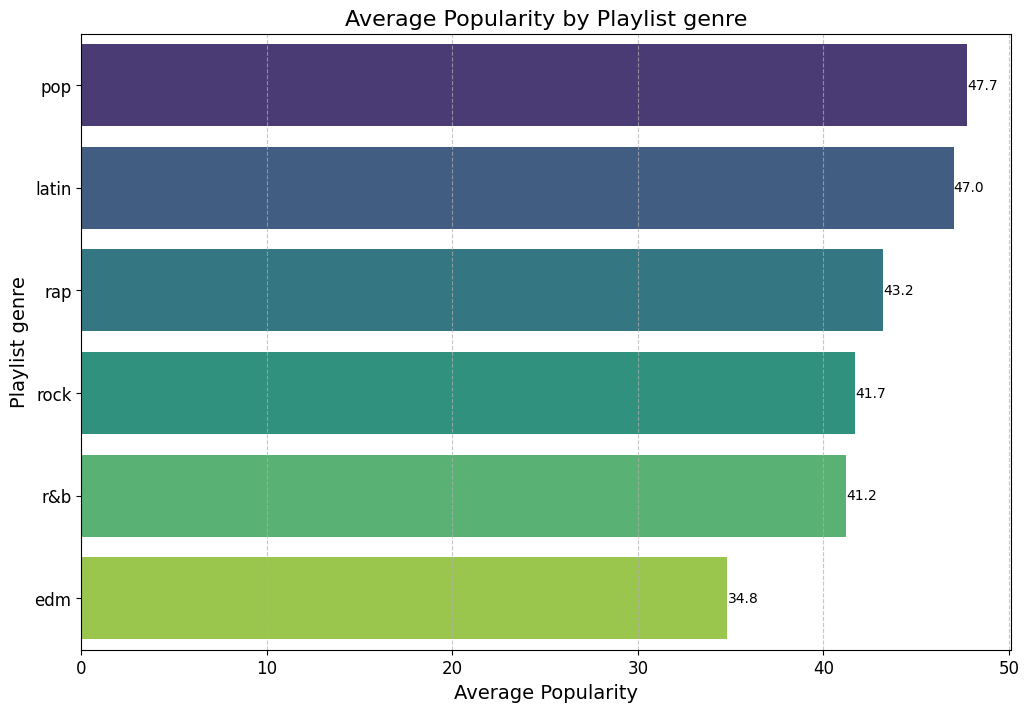

In [13]:


import matplotlib.pyplot as plt
# Assuming 'playlist_subgenre' column exists in your DataFrame (df)

# Calculate the average popularity for each playlist subgenre
playlist_subgenre_popularity = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

# Plotting with improvements
plt.figure(figsize=(12, 8))  # Adjusted figure size for better readability
sns.barplot(x=playlist_subgenre_popularity.values, y=playlist_subgenre_popularity.index, palette="viridis")

# Adding data labels with better formatting
for i, v in enumerate(playlist_subgenre_popularity.values):
    plt.text(v, i, f'{v:.1f}', color='black', va='center', ha='left')

# Enhancing readability with larger font sizes and clear labels
plt.title('Average Popularity by Playlist genre', fontsize=16)
plt.xlabel('Average Popularity', fontsize=14)
plt.ylabel('Playlist genre', fontsize=14)

# Customize tick parameters for improved clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid for easier comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


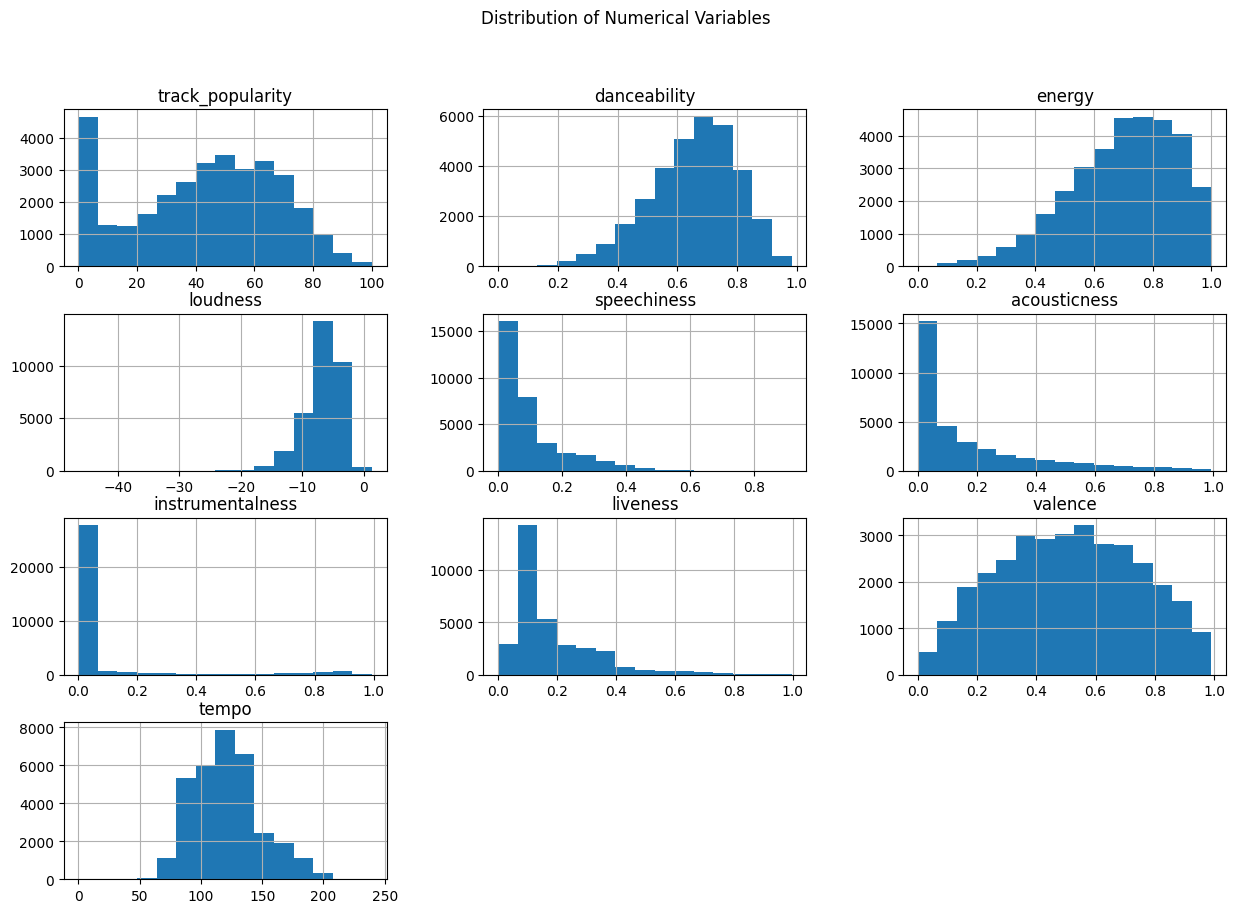

In [14]:
numerical_columns = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',]

new_df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.show()


<ipython-input-15-b4b062af483d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_characteristics.index, y=genre_characteristics[column], palette="viridis")
<ipython-input-15-b4b062af483d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_characteristics.index, y=genre_characteristics[column], palette="viridis")
<ipython-input-15-b4b062af483d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_characteristics.index, y=genre_characteristics[column], palette="viridis")
<ipython-input-15-b4b062af483d>:11: FutureWarning: 


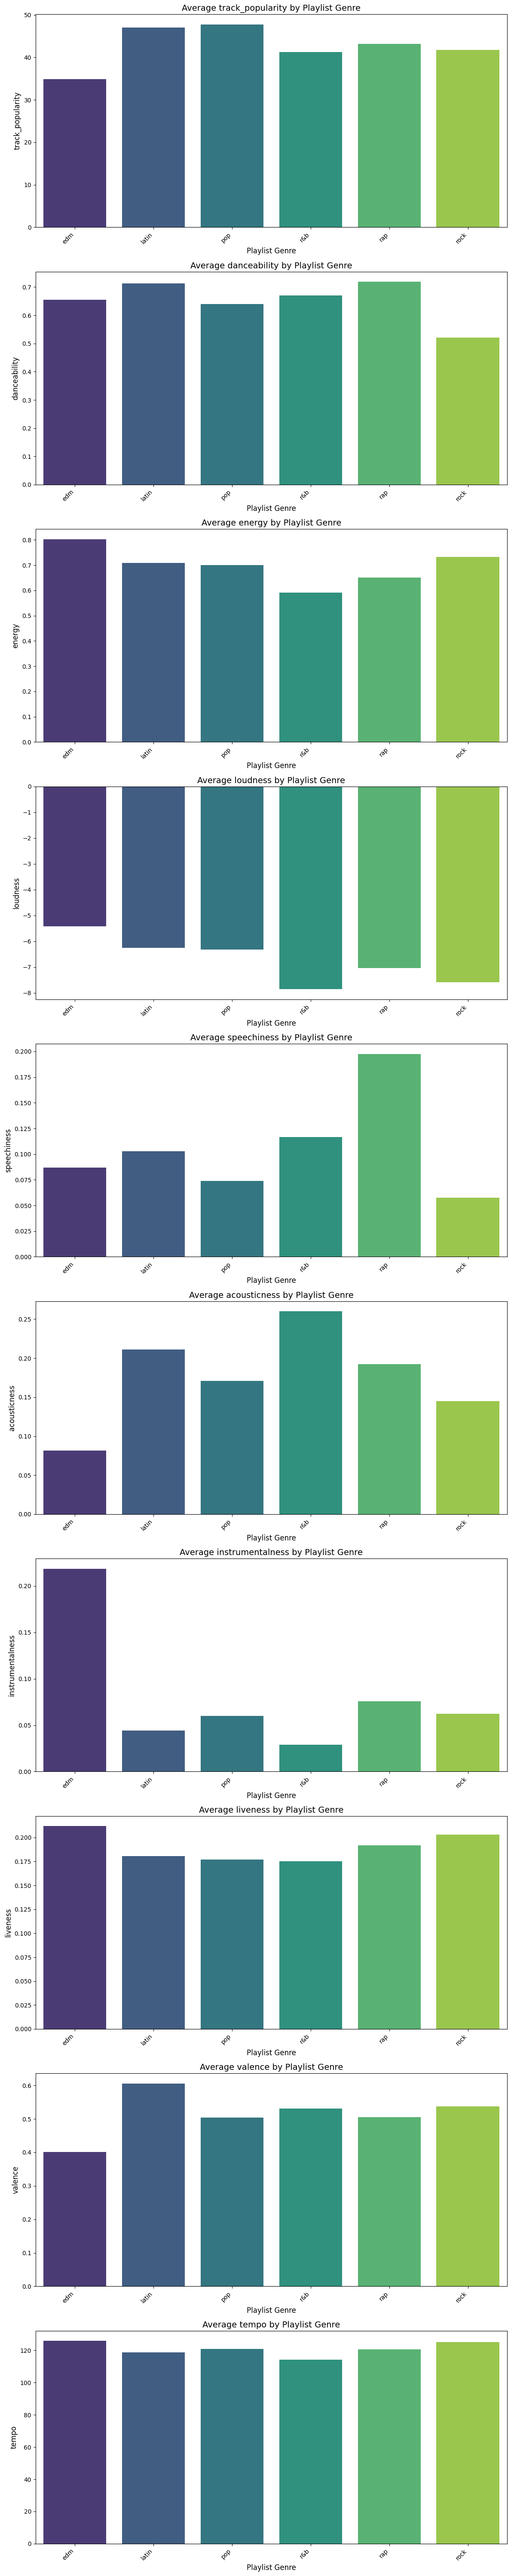

In [15]:


import matplotlib.pyplot as plt
# Assuming 'playlist_genre' column exists in your DataFrame (df)

# Calculate the average of other numerical features for each playlist genre
genre_characteristics = df.groupby('playlist_genre')[numerical_columns].mean()

# Plotting with improvements
plt.figure(figsize=(12, 6 * len(numerical_columns)))  # Adjust figure size dynamically
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.barplot(x=genre_characteristics.index, y=genre_characteristics[column], palette="viridis")
    plt.title(f'Average {column} by Playlist Genre', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.ylabel(column, fontsize=12)
    plt.xlabel('Playlist Genre', fontsize=12)
    plt.tight_layout()  # Adjust subplot params for a tight layout

plt.show()


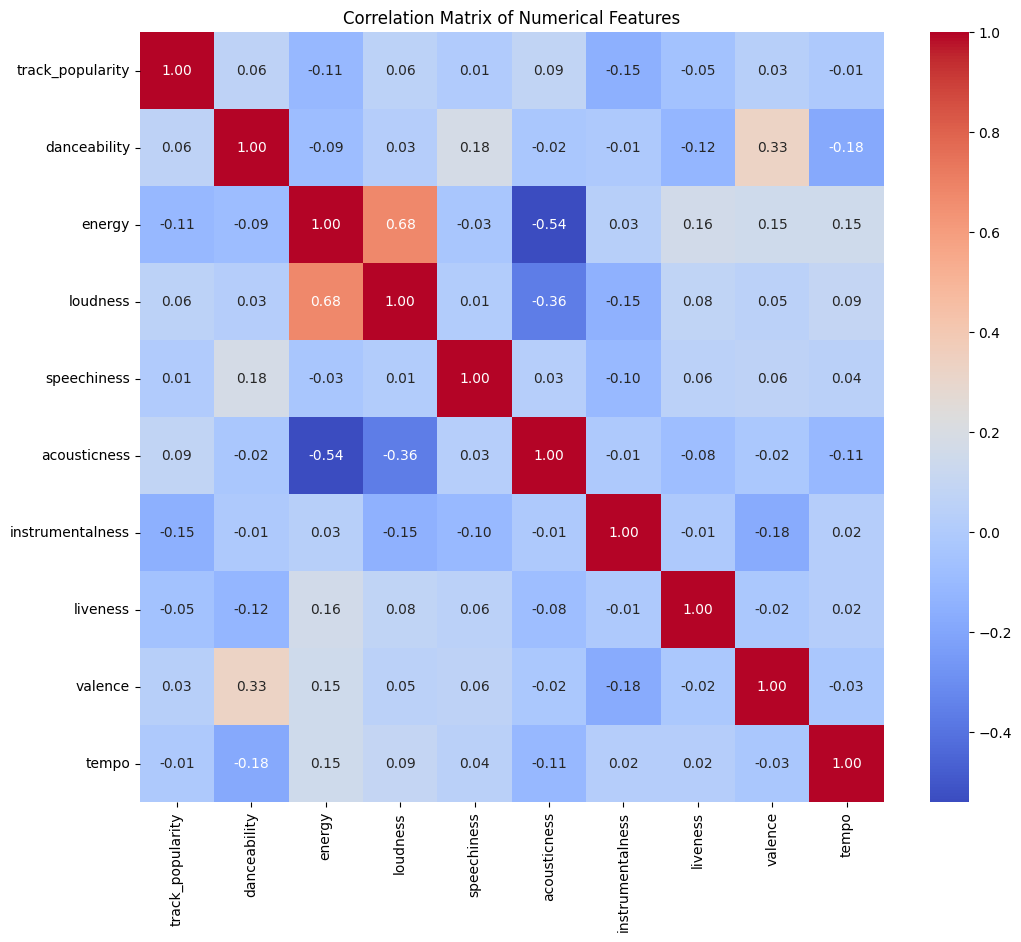

In [16]:


import matplotlib.pyplot as plt
# Correlation matrix
correlation_matrix = new_df[numerical_columns].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [17]:


import numpy as np


upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))


corr_series = upper_triangle.unstack().dropna()


positive_corr = corr_series.sort_values(ascending=False)


negative_corr = corr_series.sort_values(ascending=True)

# Print the top 5 positive correlations
print("Top 5 Positive Correlations:")
print(positive_corr.head(5))

# Print the top 5 negative correlations
print("\nTop 5 Negative Correlations:")
print(negative_corr.head(5))


Top 5 Positive Correlations:
loudness     energy          0.676654
valence      danceability    0.330687
speechiness  danceability    0.181774
liveness     energy          0.161201
valence      energy          0.151159
dtype: float64

Top 5 Negative Correlations:
acousticness      energy             -0.539754
                  loudness           -0.361667
tempo             danceability       -0.184020
valence           instrumentalness   -0.175369
instrumentalness  track_popularity   -0.149943
dtype: float64


In [18]:

features = ['danceability', 'energy',  'loudness',  'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
           ]


In [19]:
X = new_df[features]
y = new_df['playlist_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:


from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

X_scaled_df.head()

danceability  energy    loudness  speechiness  acousticness  instrumentalness  liveness  valence   tempo   
0  0.641894      1.201753  1.367025 -0.481149    -0.334048     -0.377928         -0.809187  0.031799  0.043000
1  0.490258      0.643470  0.585794 -0.688433    -0.468803     -0.359151          1.081120  0.782342 -0.777171
2  0.138738      1.284666  1.100035 -0.324205    -0.436935     -0.377824         -0.519517  0.439237  0.116304
3  0.435118      1.279138  0.984272 -0.049799    -0.667748     -0.377886          0.089632 -1.001807  0.040027
4 -0.033576      0.742966  0.685163 -0.702252    -0.432838     -0.377928         -0.692541  0.919584  0.115115

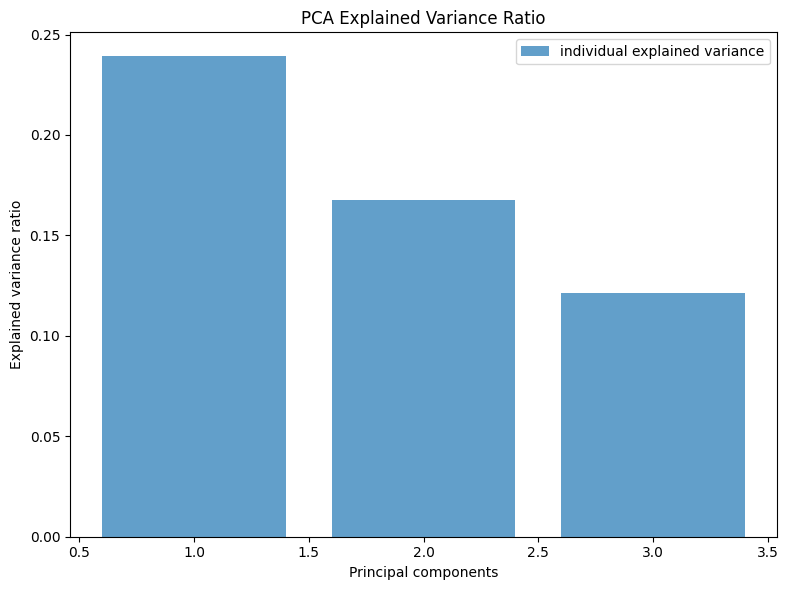

In [22]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled_df)


explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('PCA Explained Variance Ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [23]:


import plotly.express as px


fig = px.scatter_3d(x=pca_result[:, 0], y=pca_result[:, 1], z=pca_result[:, 2],
                    title='3D Scatter Plot of PCA Results')
fig.show()


Ideal k is 3 based on the Elbow Method

K = 1
Result: 6040 out of 32817 samples were correctly labeled.
Accuracy score: 0.18
------------------------------
K = 2
Result: 4697 out of 32817 samples were correctly labeled.
Accuracy score: 0.14
------------------------------
K = 3
Result: 7092 out of 32817 samples were correctly labeled.
Accuracy score: 0.22
------------------------------
K = 4
Result: 5815 out of 32817 samples were correctly labeled.
Accuracy score: 0.18
------------------------------
K = 5
Result: 3114 out of 32817 samples were correctly labeled.
Accuracy score: 0.09
------------------------------
K = 6
Result: 3726 out of 32817 samples were correctly labeled.
Accuracy score: 0.11
------------------------------
K = 7
Result: 4407 out of 32817 samples were correctly labeled.
Accuracy score: 0.13
------------------------------
K = 8
Result: 4873 out of 32817 samples were correctly labeled.
Accuracy score: 0.15
------------------------------
K = 9
Result: 3706 out of 32817 samples were correctly labeled.
Accuracy

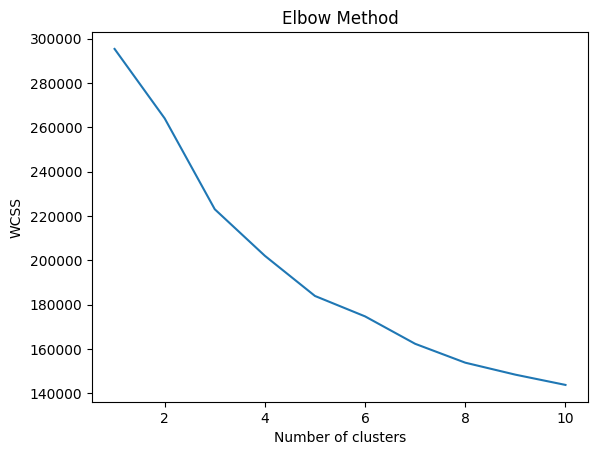

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_scaled_df is your scaled data

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled_df)
    wcss.append(kmeans.inertia_)

    labels = kmeans.labels_
    correct_labels = sum(y == labels)

    # Print the current value of k before accuracy results
    print(f"K = {i}")
    print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
    print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))
    print("-" * 30)  # Just to separate results

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [25]:


optimal_k = 5  # Replace with the value from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(X_scaled_df)

# Add cluster labels to the PCA results
pca_result_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_result_df['Cluster'] = kmeans.labels_

# 3D scatter plot with cluster coloring
fig = px.scatter_3d(pca_result_df, x='PC1', y='PC2', z='PC3', color='Cluster', title='PCA 3D Plot with Clusters')
fig.show()


In [26]:


from sklearn.metrics import silhouette_score

# Assuming X_scaled_df and kmeans are already defined from the previous code
# Calculate the silhouette score
silhouette_avg = silhouette_score(pca_result, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.2429887312535329


In [27]:
# Add cluster labels to DataFrame
new_df['kmeans_cluster'] = kmeans.labels_

K = 2
Result: 3543 out of 32817 samples were correctly labeled.
Silhouette Score for K=2: 0.24
------------------------------
K = 3
Result: 7934 out of 32817 samples were correctly labeled.
Silhouette Score for K=3: 0.22
------------------------------
K = 4
Result: 6816 out of 32817 samples were correctly labeled.
Silhouette Score for K=4: 0.20
------------------------------
K = 5
Result: 6475 out of 32817 samples were correctly labeled.
Silhouette Score for K=5: 0.17
------------------------------


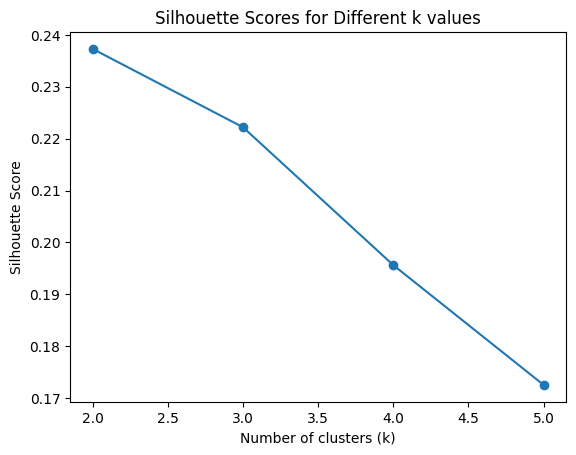

Best k based on the silhouette score: 2


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming pca_result is your PCA-reduced dataset
silhouette_scores = []
k_values = range(2, 6)  # Test k values from 2 to 4

for k in k_values:
    agglomerative_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglomerative_clustering.fit_predict(pca_result)

    # Print the current value of k before accuracy results
    print(f"K = {k}")
    correct_labels = sum(y == labels)


    # Compute silhouette score
    silhouette_avg = silhouette_score(pca_result, labels)
    silhouette_scores.append(silhouette_avg)
    print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
    print(f"Silhouette Score for K={k}: {silhouette_avg:.2f}")
    print("-" * 30)  # Just to separate results

# Plot the silhouette scores to analyze the best k
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k values')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Find the best k based on the highest silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Best k based on the silhouette score: {best_k}")

In [29]:


# Assuming pca_result is your PCA-reduced dataset and best_k is determined
agglomerative_clustering = AgglomerativeClustering(n_clusters= 6, linkage='ward')
result_agglo = agglomerative_clustering.fit_predict(pca_result)

# Now 'result_agglo' contains the cluster labels for your data
result_agglo


array([4, 4, 4, ..., 1, 1, 1])

In [30]:

import pandas as pd
import plotly.express as px

# Assuming pca_result and result_agglo are defined from previous code
pca_result_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_result_df['Cluster'] = result_agglo
new_df['agglo_cluster'] = result_agglo

fig = px.scatter_3d(pca_result_df, x='PC1', y='PC2', z='PC3', color='Cluster', title='Agglomerative Clustering 3D Plot')
fig.show()


In [31]:


# Assuming pca_result and result_agglo are defined from previous code
silhouette_avg = silhouette_score(pca_result, result_agglo)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_avg}")


Silhouette Score for Agglomerative Clustering: 0.18138004272102476


In [32]:
new_df.head()

track_name                                         track_artist       track_popularity playlist_genre playlist_subgenre  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo    duration_ms  kmeans_cluster  agglo_cluster
0  I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran  66                pop            dance pop         0.748         0.916    6  -2.634     1     0.0583       0.1020        0.000000          0.0653    0.518    122.036  194754       0               4            
1                    Memories - Dillon Francis Remix          Maroon 5  67                pop            dance pop         0.726         0.815   11  -4.969     1     0.0373       0.0724        0.004210          0.3570    0.693     99.972  162600       0               4            
2                    All the Time - Don Diablo Remix      Zara Larsson  70                pop            dance pop         0.675         0.931    1  -3.432     0     0.0742       0.0794        0.000023          0.1100    0.613    124.008  176616       0               4            
3                  Call You Mine - Keanu Silva Remix  The Chainsmokers  60                pop            dance pop         0.718         0.930    7  -3.778     1     0.1020       0.0287        0.000009          0.2040    0.277    121.956  169093       4               1            
4            Someone You Loved - Future Humans Remix     Lewis Capaldi  69                pop            dance pop         0.650         0.833    1  -4.672     1     0.0359       0.0803        0.000000          0.0833    0.725    123.976  189052       0               4

In [33]:
new_df.groupby('agglo_cluster')[features].mean()

danceability  energy    loudness   speechiness  acousticness  instrumentalness  liveness  valence   tempo     
agglo_cluster                                                                                                                
0              0.748203      0.625317  -7.496698  0.135231     0.224636      0.012963          0.153369  0.614385  111.113505
1              0.553274      0.786753  -5.534596  0.072658     0.074893      0.042856          0.228487  0.391581  130.877483
2              0.571739      0.429975 -10.757805  0.065040     0.462689      0.187994          0.148642  0.326124  114.273806
3              0.661350      0.832875  -6.164730  0.062135     0.041232      0.716951          0.158261  0.408092  124.572021
4              0.721833      0.853213  -4.339616  0.091473     0.069506      0.021120          0.170469  0.689397  117.232794
5              0.629997      0.781194  -5.371160  0.264049     0.130077      0.007156          0.364455  0.567449  145.275822

In [34]:


import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

# Assuming pca_result is your PCA-transformed data
dbscan = DBSCAN(eps=0.5, min_samples=6)  # Adjust eps and min_samples as needed
db_clusters = dbscan.fit_predict(pca_result)

# Replace outlier label -1 with a new cluster label (e.g., the maximum cluster label + 1)
max_cluster_label = np.max(db_clusters)
new_df['db_cluster'] = np.where(db_clusters == -1, max_cluster_label + 1, db_clusters)


# 3D scatter plot with DBSCAN cluster coloring
import plotly.express as px
pca_result_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_result_df['Cluster'] = new_df['db_cluster']
fig = px.scatter_3d(pca_result_df, x='PC1', y='PC2', z='PC3', color='Cluster', title='DBSCAN Clustering 3D Plot')
fig.show()


In [35]:


import numpy as np
# Assuming pca_result is your PCA-transformed data
dbscan = DBSCAN(eps=0.5, min_samples=6)  # Adjust eps and min_samples as needed
db_clusters = dbscan.fit_predict(pca_result)

# Replace outlier label -1 with a new cluster label (e.g., the maximum cluster label + 1)
max_cluster_label = np.max(db_clusters)
new_df['db_cluster'] = np.where(db_clusters == -1, max_cluster_label + 1, db_clusters)


In [36]:


# Assuming pca_result and db_clusters are defined from previous code
silhouette_avg = silhouette_score(pca_result, db_clusters)
print(f"Silhouette Score for DBSCAN Clustering: {silhouette_avg}")


Silhouette Score for DBSCAN Clustering: 0.3611892016321591


In [37]:
new_df.head()

track_name                                         track_artist       track_popularity playlist_genre playlist_subgenre  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo    duration_ms  kmeans_cluster  agglo_cluster  db_cluster
0  I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran  66                pop            dance pop         0.748         0.916    6  -2.634     1     0.0583       0.1020        0.000000          0.0653    0.518    122.036  194754       0               4              0         
1                    Memories - Dillon Francis Remix          Maroon 5  67                pop            dance pop         0.726         0.815   11  -4.969     1     0.0373       0.0724        0.004210          0.3570    0.693     99.972  162600       0               4              0         
2                    All the Time - Don Diablo Remix      Zara Larsson  70                pop            dance pop         0.675         0.931    1  -3.432     0     0.0742       0.0794        0.000023          0.1100    0.613    124.008  176616       0               4              0         
3                  Call You Mine - Keanu Silva Remix  The Chainsmokers  60                pop            dance pop         0.718         0.930    7  -3.778     1     0.1020       0.0287        0.000009          0.2040    0.277    121.956  169093       4               1              0         
4            Someone You Loved - Future Humans Remix     Lewis Capaldi  69                pop            dance pop         0.650         0.833    1  -4.672     1     0.0359       0.0803        0.000000          0.0833    0.725    123.976  189052       0               4              0

In [38]:


print(new_df.nunique())


track_name           23449
track_artist         10692
track_popularity       101
playlist_genre           6
playlist_subgenre       24
danceability           822
energy                 952
key                     12
loudness             10222
mode                     2
speechiness           1270
acousticness          3731
instrumentalness      4729
liveness              1624
valence               1362
tempo                17682
duration_ms          19782
kmeans_cluster           5
agglo_cluster            6
db_cluster               4
dtype: int64


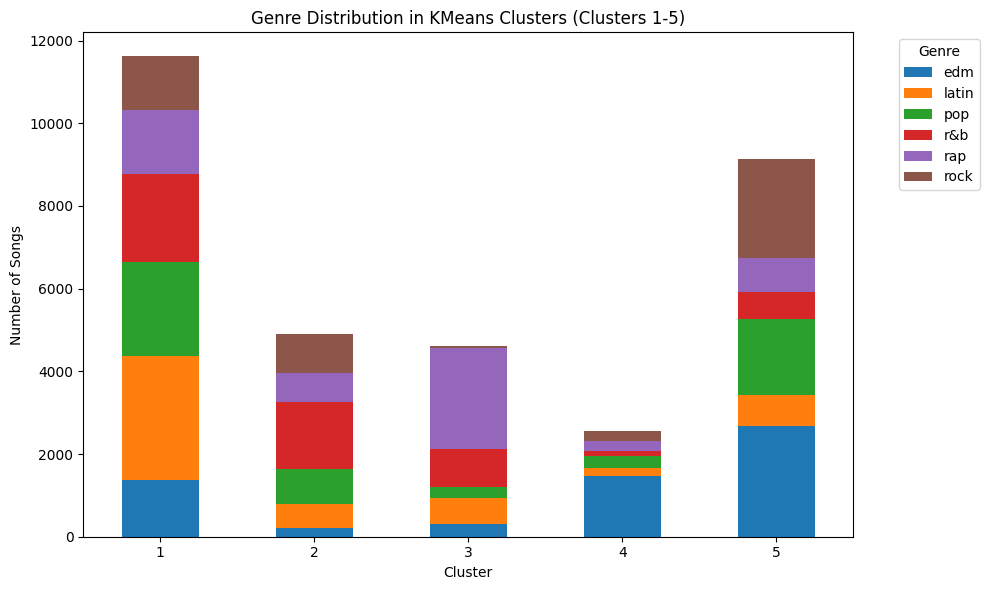

In [39]:


import matplotlib.pyplot as plt

# Assuming 'new_df' and 'kmeans' are defined from the previous code
# and 'new_df' contains the 'kmeans_cluster' column

# Replace cluster labels 0-4 with 1-5
new_df['kmeans_cluster'] = new_df['kmeans_cluster'] + 1

# Group data by cluster and genre, then count occurrences
cluster_genre_counts = new_df.groupby(['kmeans_cluster', 'playlist_genre']).size().unstack(fill_value=0)

# Plot the genre distribution for each cluster
cluster_genre_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Genre Distribution in KMeans Clusters (Clusters 1-5)')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


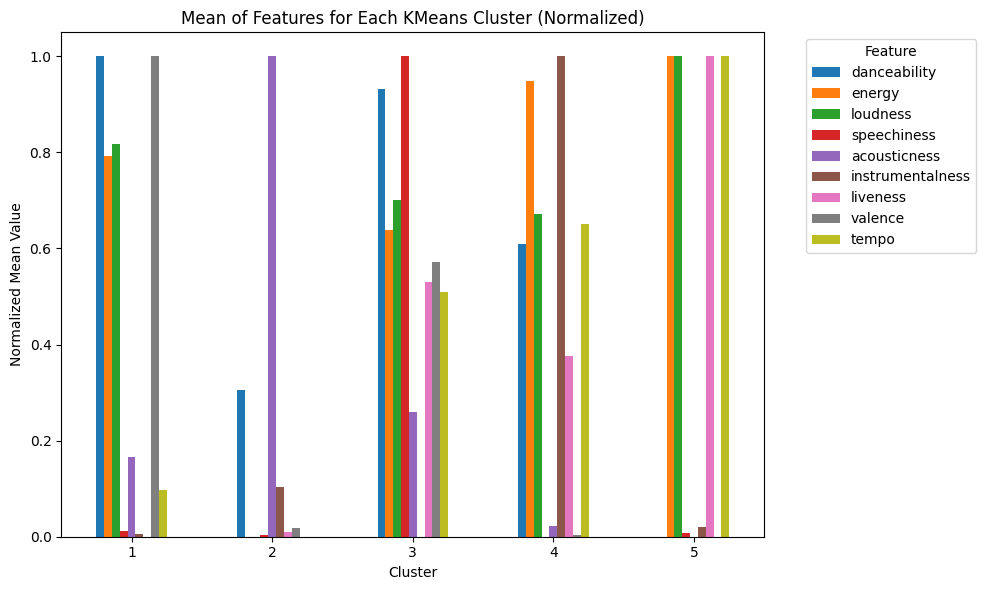

In [40]:


import matplotlib.pyplot as plt
# Assuming new_df and features are defined from the previous code

# Calculate the mean of features for each kmeans cluster
cluster_means = new_df.groupby('kmeans_cluster')[features].mean()

# Normalize the cluster means to a common scale (e.g., 0-1)
cluster_means_normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Plot the normalized means for each cluster
cluster_means_normalized.plot(kind='bar', figsize=(10, 6))
plt.title('Mean of Features for Each KMeans Cluster (Normalized)')
plt.xlabel('Cluster')
plt.ylabel('Normalized Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [41]:
# Track name to find similar songs
track_name = 'thank u, next'

# Filter rows with the same cluster as the given track
similar_songs = new_df[(new_df['track_name'] != track_name) &
                       (new_df['kmeans_cluster'] == new_df.loc[new_df['track_name'] == track_name, 'kmeans_cluster'].iloc[0])]

# Randomize the selection of similar songs
num_similar_songs = 10  # Number of similar songs to show
random_indices = np.random.choice(similar_songs.index, size=num_similar_songs, replace=False)
randomized_similar_songs = similar_songs.loc[random_indices]

# Show similar songs
randomized_similar_songs[['track_name', 'track_artist']]

track_name               track_artist        
20578        Funky Little Beat               Connie
26274              Sailor Team        Macross 82-99
20915                 Perfecto  GabrielRodriguezEMC
1940               Some Nights                 fun.
30380     Meio Termo - Ao Vivo          Avine Vinny
10938            DJ Turn It Up          Yellow Claw
28575                   Ratata             TV Noise
29740  RIP - Steve Reece Remix       Olivia O'Brien
1561                      Liar       Camila Cabello
16622                 Justicia    Silvestre Dangond